## Application du clustering au données digits

In [11]:
import numpy as np
from sklearn.cluster import  KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

raw = np.loadtxt("KeyboardData1.csv",dtype='str',delimiter=',')
data = raw[1:,1:]
variables = raw[1, :]
individus = raw[1:, 0].astype(int)

In [17]:
print(np.shape(data))

(19176, 21)


### Réalisation du clustering

Le nombre de classes nclus est choisi par défaut comme égal au nombre d'étiquettes

In [14]:
# Clustering avec la fonction KMeans du module scikit learn ===================
k_means = KMeans(init='k-means++', n_clusters=len(np.unique(individus)), n_init=10)
k_means.fit(data)
cl = k_means.labels_ # classes "prédites" 


In [18]:
k_means.cluster_centers_

array([[0.08654498, 0.20271866, 0.08384737, ..., 0.08901722, 0.22631388,
        0.07844115],
       [0.09244132, 0.23323301, 0.07711513, ..., 0.10519154, 0.16456424,
        0.09469562],
       [0.08717804, 0.29192792, 0.1133969 , ..., 0.08761384, 0.40483795,
        0.08986635],
       ...,
       [0.09342083, 0.18065644, 0.09014167, ..., 0.0933947 , 0.68523295,
        0.1020072 ],
       [0.05936   , 0.92664   , 0.05692   , ..., 0.06134   , 4.73956   ,
        0.05896   ],
       [0.09437806, 0.13647878, 0.0835295 , ..., 0.1069482 , 0.17551043,
        0.09360432]])

### Calcul de l'étiquette majoritaire de chaque classe

In [24]:
print("Classe".ljust(19,'.')+" ",end='')
for k in range(k_means.n_clusters): print(str(k)+" ",end='')
print("\n"+"Label majoritaire".ljust(19,'.')+" ",end='')
cl_lab = np.copy(cl)
for k in range(k_means.n_clusters):
  counts=np.unique(individus[cl==k],return_counts=True) # Nb d'occurences de chaque label
  maj_lab=individus[np.argmax(counts[1])] # Son étiquette
  imax=np.argmax(counts[1]) # Calcul du majoritaire
  maj_lab=counts[0][imax] # Son étiquette
  print(str(maj_lab),end=' ')
  cl_lab[cl==k] = maj_lab
cl_lab = np.copy(cl)
print('\n')

Classe............. 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
Label majoritaire.. 44 42 49 25 49 49 36 38 25 49 52 24 43 27 10 41 27 22 49 33 22 49 22 16 36 40 3 22 33 36 16 24 49 46 49 36 35 30 7 19 40 22 55 36 30 38 40 36 19 36 47 



### Calcul de la matrice de confusion brute

In [19]:
conf_mat =  confusion_matrix(individus,cl)
print("Matrice de confusion:")
print("   Une ligne = un digit\n   Une colonne = un cluster\n")
print(conf_mat)

Matrice de confusion:
   Une ligne = un digit
   Une colonne = un cluster

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  3  0 ...  0  0  0]
 ...
 [ 0  5  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 2 13  2 ...  0  0  0]]


### Représentation en barplot

Text(0.5, 1.0, 'Répartition dans chaque classe')

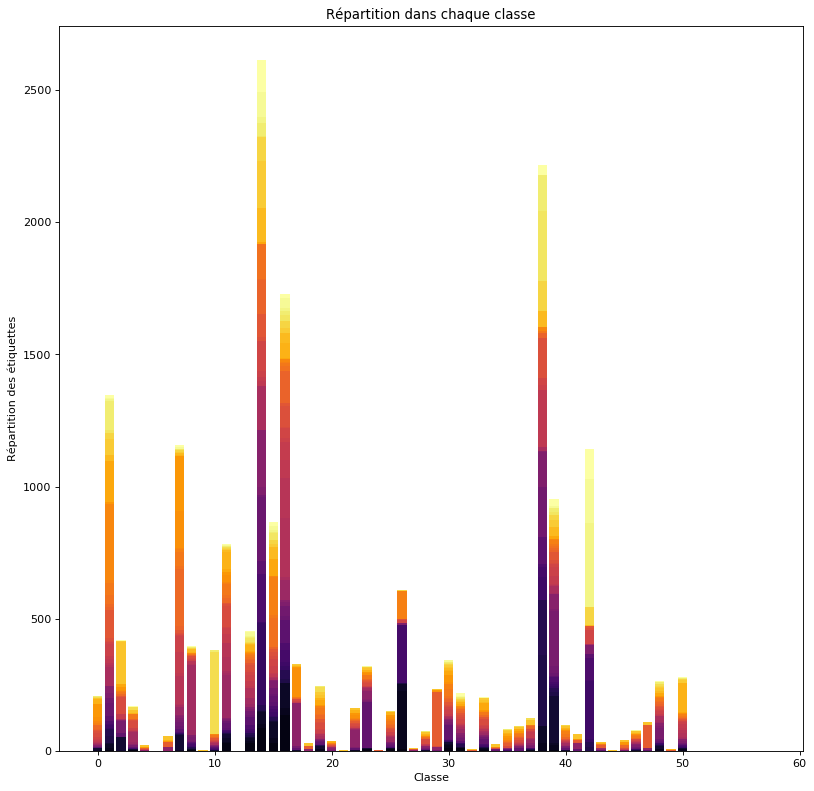

In [22]:
def BarPlotMat(M): 
# Fait un barplot pour chaque colonne de M.
# La couleur correspond à l'indice, la hauteur à la valeur
  I=M.shape[0]
  J=M.shape[1]
  ind = np.arange(J)
  haut = 0*M[0,:]
  for i in range(I):
    plt.bar(ind,M[i,:],bottom=haut,color=plt.cm.inferno(i/(I-1)))
    haut += M[i,:]
fig=plt.figure(num=3, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
BarPlotMat(conf_mat)
plt.xlabel('Classe')
plt.ylabel('Répartition des étiquettes')
plt.title('Répartition dans chaque classe')
